# Evaluation

In [1]:
import sys
sys.path.append('../')
from src.scoring_functions import *
from src.load_data import *
from plotnine import *

In [2]:
MODEL_COLORS = {
    'Ensemble': '#009E73',
    'LightGBM': '#B30000',
    'LightGBM-NoCovariates': '#B30000',
    'LightGBM-NoCovid': '#B30000',
    'LightGBM-Oracle': '#B30000',
    'TSMixer': '#E69F00',
    'TSMixer-NoCovariates': '#E69F00',
    'TSMixer-NoCovid': '#E69F00',
    'TSMixer-Oracle': '#E69F00',
    'hhh4': '#3C4AAD',
    'hhh4-NoCovid': '#3C4AAD',
    'Nowcast': '#56B4E9',
    'Baseline-Historical': '#80471C',
    'Baseline-Persistence' : '#80471C',
}

In [3]:
MODEL_ORDER = ['Nowcast', 'Ensemble', 
               'LightGBM', 'LightGBM-NoCovariates', 'LightGBM-NoCovid', 'LightGBM-Oracle', 
               'TSMixer', 'TSMixer-NoCovariates', 'TSMixer-NoCovid', 'TSMixer-Oracle', 
               'hhh4', 'hhh4-NoCovid', 'Baseline-Persistence', 'Baseline-Historical']

In [19]:
MAIN_MODELS = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4', 'Baseline-Historical', 'Baseline-Persistence']

In [5]:
# ['Nowcast'] + MAIN_MODELS

In [6]:
df = load_predictions()

In [8]:
df_nowcasts = load_nowcasts(quantiles=QUANTILES)

In [9]:
df = pd.concat([df, df_nowcasts], ignore_index=True)

# Compute scores

#### National level

In [11]:
evaluate_models(df, 'national')

,model,spread,overprediction,underprediction,wis,c50,c95
0,Nowcast,107.971429,108.383721,43.585548,259.940698,0.436047,0.959302
1,Ensemble,439.565077,172.478837,356.460427,968.504342,0.523256,0.976744
2,LightGBM-NoCovariates,502.582805,99.281196,466.513416,1068.377418,0.645349,0.965116
3,LightGBM,366.317188,73.479102,633.972642,1073.768932,0.534884,0.936047
4,TSMixer,514.931062,76.255781,487.077961,1078.264803,0.529070,0.970930
5,TSMixer-NoCovariates,401.921676,188.638293,500.861400,1091.421369,0.331395,0.918605
6,LightGBM-Oracle,304.093951,86.813954,739.066780,1129.974685,0.401163,0.901163
7,hhh4,429.671927,390.166944,368.155316,1187.994186,0.447674,0.889535
8,LightGBM-NoCovid,352.724842,82.108450,753.873226,1188.706517,0.377907,0.895349
9,TSMixer-Oracle,357.941456,118.443214,751.851516,1228.236186,0.308140,0.854651


In [35]:
# evaluate_models(df, 'national', by_horizon=True)

#### Age groups

In [12]:
evaluate_models(df, 'age')

,model,spread,overprediction,underprediction,wis,c50,c95
0,Nowcast,16.697010,26.173865,17.120155,59.991030,0.371124,0.811047
1,Ensemble,95.666729,44.403161,62.374769,202.444659,0.533915,0.959302
2,LightGBM-NoCovariates,92.552689,34.171858,91.707788,218.432334,0.451550,0.864341
3,LightGBM,67.953899,34.845624,123.369175,226.168698,0.348837,0.805233
4,LightGBM-Oracle,58.598490,35.260280,138.632175,232.490945,0.261628,0.768411
5,TSMixer,100.020735,28.693522,104.781453,233.495710,0.452519,0.878876
6,hhh4,118.145764,65.449612,54.678295,238.273671,0.579457,0.964147
7,hhh4-NoCovid,107.861988,83.397148,56.028378,247.287514,0.516473,0.934109
8,LightGBM-NoCovid,61.604375,54.399783,132.006017,248.010176,0.239341,0.743217
9,TSMixer-Oracle,75.795335,35.566005,137.038800,248.400140,0.348837,0.799419


In [16]:
# evaluate_models(df, 'age', by_horizon=True)

In [17]:
# evaluate_models(df, 'age', by_age=True)

# Prepare scores

In [13]:
df_national = evaluate_models(df, 'national')
df_age = evaluate_models(df, 'age')

In [14]:
df_wide = pd.concat([
    df_national.assign(level='national'),
    df_age.assign(level='age')],
    ignore_index=True)

In [15]:
df_wide['level'] = pd.Categorical(df_wide['level'], categories=['national', 'age'], ordered=True)

In [16]:
df_long = pd.melt(df_wide, id_vars=['level', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

# Plots

In [17]:
def plot_total_scores(df_long, models=None):
    
    if models is not None:
        df_long = df_long[df_long.model.isin(models)].copy()
    model_order = [m for m in MODEL_ORDER if m in df_long.model.unique()]
    df_long['model'] = pd.Categorical(df_long['model'], categories=model_order, ordered=True) 

    p = (ggplot()
        + facet_wrap('~level', nrow=1, scales='free_y', labeller=lambda x: ('National level' if x == 'national' else 'Age groups'))
        + geom_bar(df_long[df_long.metric == 'wis'], aes(x='model', y='value', color='model'), fill='white', stat='identity', width=0.7, show_legend=False)
        + geom_bar(df_long[df_long.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric', color='model'), size=0.1, stat='identity', width=0.7, 
                   show_legend={'color': False,
                                'fill': False,
                                'alpha': True})
        + scale_color_manual(values=MODEL_COLORS)
        + scale_fill_manual(values=MODEL_COLORS)
        + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=False))
        + labs(x="", y="WIS", color="Model", alpha="Decomposition of WIS:", title="")
        #+ coord_flip()
        + theme_bw()
        + theme(legend_position='right',
                legend_title_position='top',
                strip_text=element_text(size=12),             # Facet title text size
                legend_title=element_text(size=10),           # Legend title text size
                legend_text=element_text(size=9),             # Legend item text size
                axis_text_x=element_text(size=9, rotation=90, ha="center"),        # Axis text (tick labels) size
                axis_text_y=element_text(size=10),
                axis_title=element_text(size=10),             # Axis title text size
                plot_title=element_text(size=14))              # Plot title text size)
       )
    return p

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


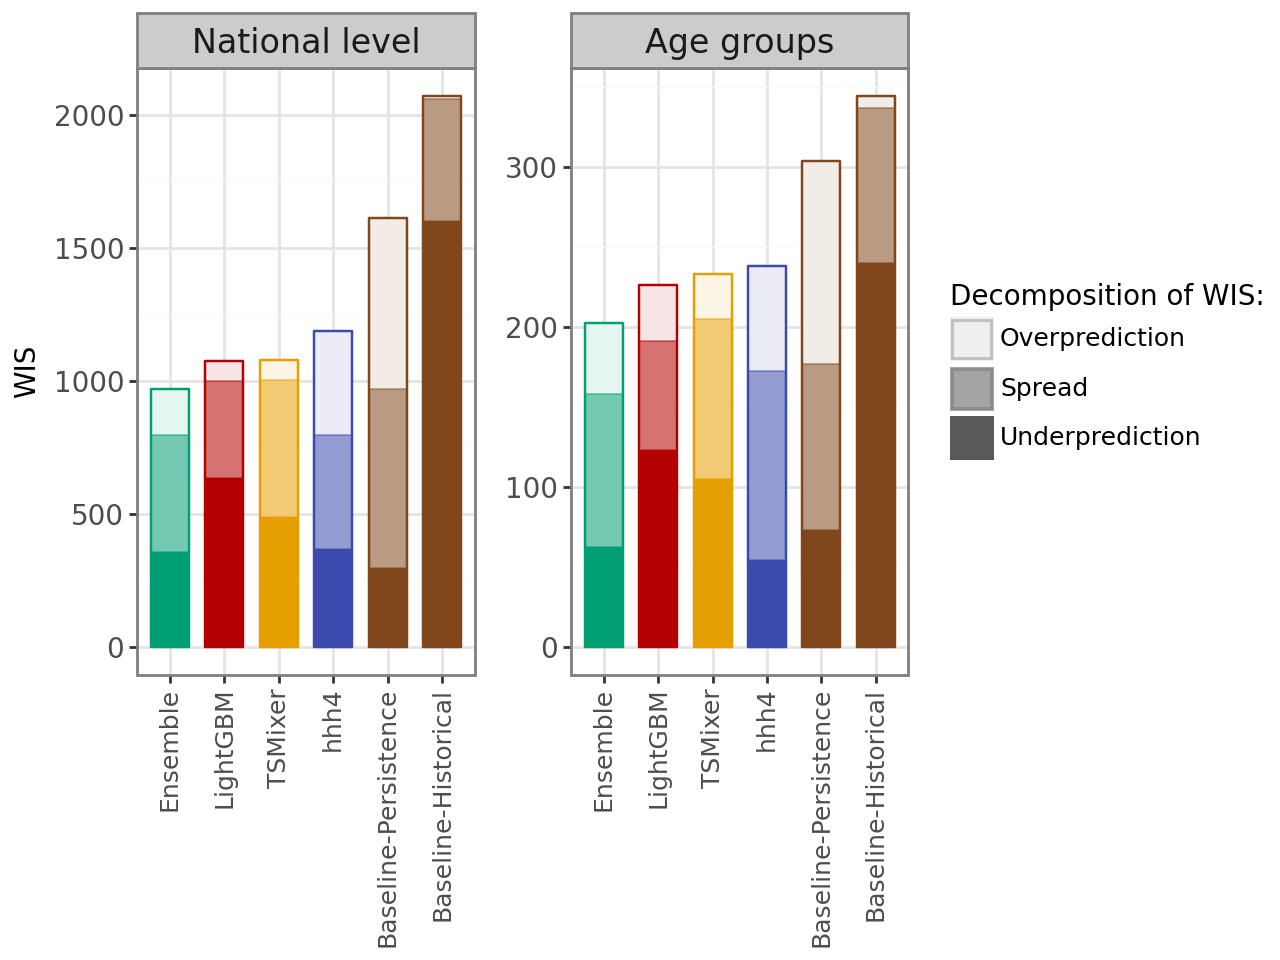

In [20]:
plot_total_scores(df_long, models=MAIN_MODELS)

In [27]:
p.save("../figures/wis.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis.pdf


In [21]:
def plot_coverage(df_wide, models=None):
    if models is not None:
        df_wide = df_wide[df_wide.model.isin(models)].copy()
    model_order = [m for m in MODEL_ORDER if m in df_wide.model.unique()]
    df_wide['model'] = pd.Categorical(df_wide['model'], categories=model_order, ordered=True) 
    
    alphas = {"50%": 0.7, "95%": 0.4}

    p = (
        ggplot(df_wide, aes(x='model'))
        + facet_wrap('~level', nrow=1, scales='fixed', labeller=lambda x: ('National level' if x == 'national' else 'Age groups'))
        + expand_limits(y=1)  # Ensure y-axis starts at 1

        # Add columns for 95% and 50% coverage with respective alpha transparency
        + geom_col(aes(y='c95'), width=0.7, fill='white', show_legend={'fill': False})
        + geom_col(aes(y='c95', fill='model', alpha='"95%"'), width=0.7, show_legend={'fill': False})
        + geom_col(aes(y='c50', fill='model', alpha='"50%"'), width=0.7, show_legend={'fill': False})

        # Horizontal dashed lines at y = 0.5 and y = 0.95
        + geom_hline(yintercept=[0.5, 0.95], linetype='dashed')

        # Customize y-axis labels to display "0" instead of omitting 0
        + scale_y_continuous(labels=lambda y: ["0" if val == 0 else val for val in y])

        # Labels for axes, color, and alpha legend
        + labs(
            x='',
            y="Empirical coverage",
            color="Model",
            alpha="Prediction interval: "
        )

        # Conditional color mapping for fill
        + scale_fill_manual(values=MODEL_COLORS)

        # Flip coordinates to make x-axis vertical
        #+ coord_flip()

        # Custom alpha levels for each bar transparency
        + scale_alpha_manual(values=alphas, guide=guide_legend(reverse=False))

        # Basic theme with customized legend position and alignment
        + theme_bw()
        + theme(
            legend_position='right',
            legend_title_position='top',
            strip_text=element_text(size=12),
            legend_title=element_text(size=9),
            legend_text=element_text(size=8),
            axis_text_x=element_text(size=9, rotation=90, ha="center"),
            axis_text_y=element_text(size=8),
            axis_title=element_text(size=10),
            plot_title=element_text(size=14),
            panel_spacing=0.025
        )
    )

    return p

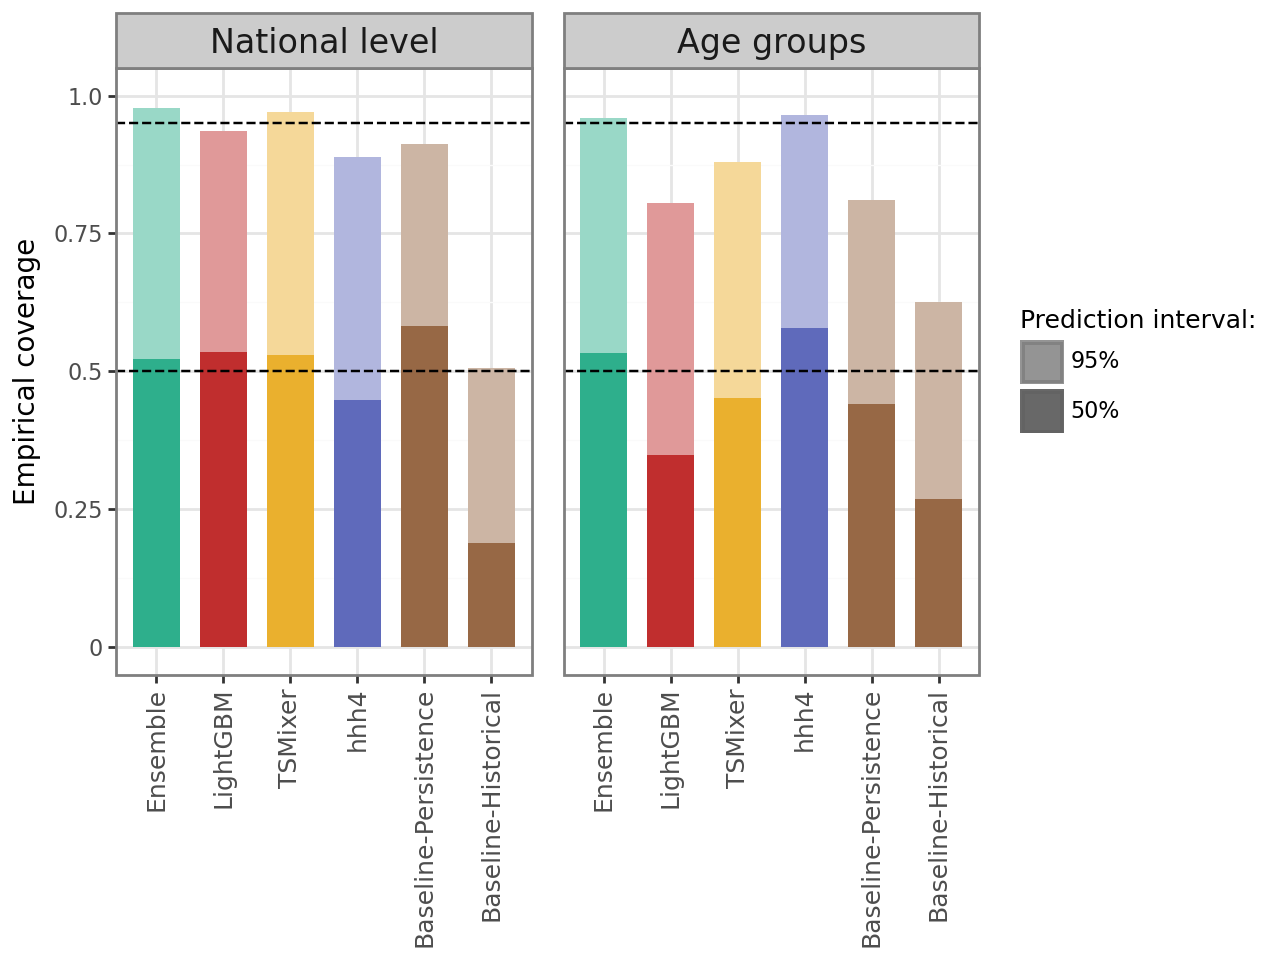

In [22]:
plot_coverage(df_wide, MAIN_MODELS)

In [32]:
p.save("../figures/coverage.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/coverage.pdf


## By age group

In [23]:
scores_age = evaluate_models(df, 'age', by_age=True)

In [24]:
scores_age = pd.melt(scores_age, id_vars=['age_group', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

In [25]:
def plot_scores_by_age_group(scores, models=None):
    if models is not None:
        scores = scores[scores.model.isin(models)].copy()
    model_order = [m for m in MODEL_ORDER if m in scores.model.unique()]
    scores['model'] = pd.Categorical(scores['model'], categories=model_order, ordered=True) 
    
    plot = (
        ggplot() 
        + geom_bar(scores[scores.metric == 'wis'], aes(x='model', y='value', color='model'), fill='white', stat='identity', width=0.7,
                   show_legend=False)
        + geom_bar(scores[scores.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric'), size=0.1, stat='identity', width=0.7, 
                   show_legend={'color': False,
                                'fill': False,
                                'alpha': True})
        + scale_color_manual(values=MODEL_COLORS)
        + scale_fill_manual(values=MODEL_COLORS)
        + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=False))
        + labs(x="", y="WIS", color="Model", alpha="Decomposition\nof WIS:", title="")
        + facet_wrap('~age_group')
        + theme_bw()
        + theme(legend_position='right',
            legend_title_position='top',
            strip_text=element_text(size=10),             # Facet title text size
            legend_title=element_text(size=9),           # Legend title text size
            legend_text=element_text(size=8),             # Legend item text size
            axis_text_x=element_text(size=9, rotation=90, ha="center"),               # Axis text (tick labels) size
            axis_text_y=element_text(size=9),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=14)              # Plot title text size)
       )
        #+ coord_flip()
    )
    
    return plot

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


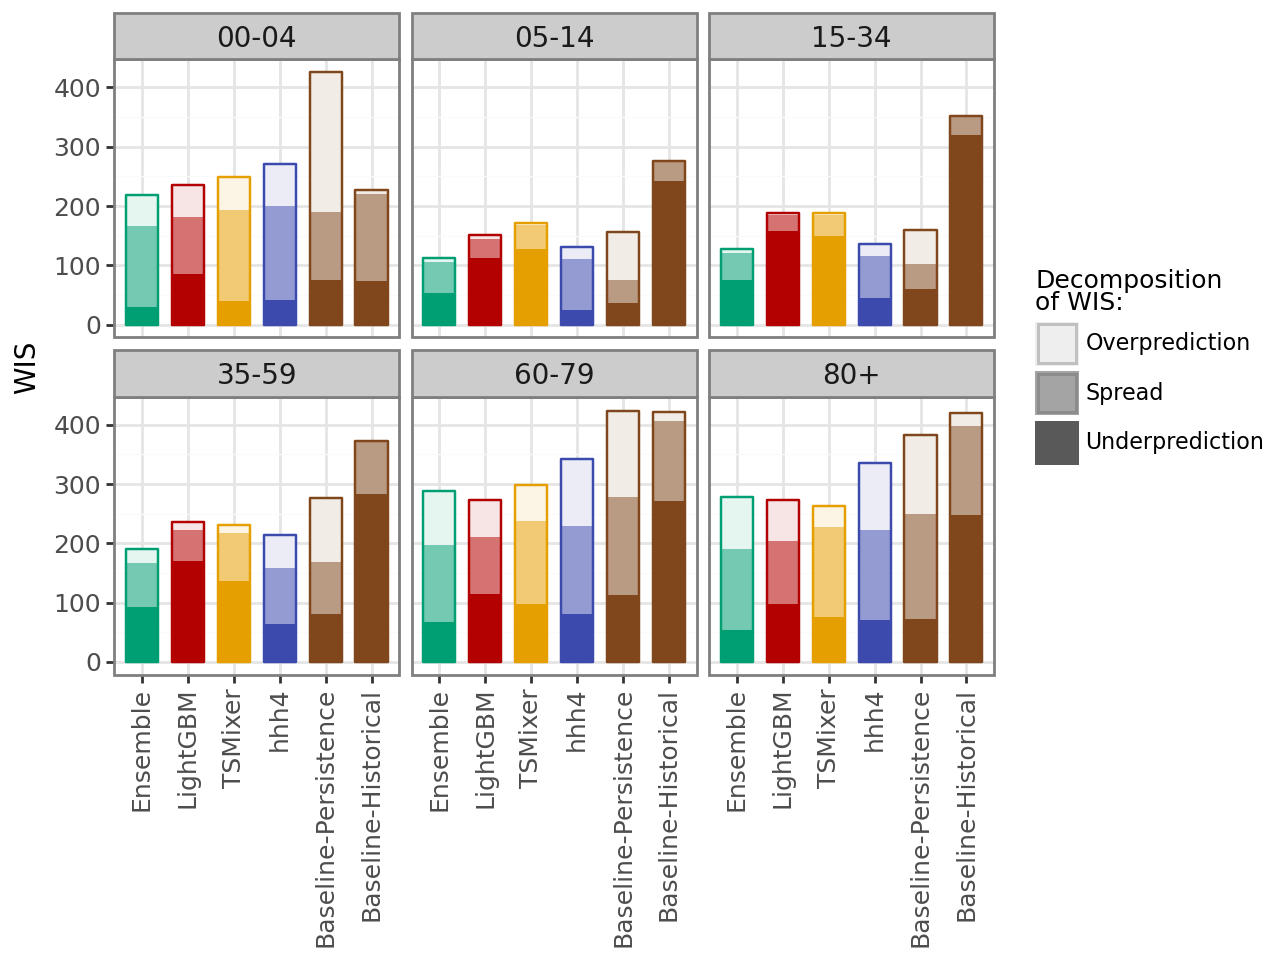

In [26]:
p = plot_scores_by_age_group(scores_age, MAIN_MODELS)
p

In [61]:
p.save("../figures/wis_age.pdf", width = 160, height = 110, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 110.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_age.pdf


## By horizon

In [27]:
df_national = evaluate_models(df, 'national', by_horizon=True)
df_age = evaluate_models(df, 'age', by_horizon=True)

df_wide = pd.concat([
    df_national.assign(level='national'),
    df_age.assign(level='age')],
    ignore_index=True)

df_long = pd.melt(df_wide, id_vars=['level', 'horizon', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

df_long['level'] = pd.Categorical(df_long['level'], categories=['national', 'age'], ordered=True)

In [31]:
def plot_scores_by_horizon_and_model(df, level='national', models=None):
    scores = df[df.level==level].copy()
    
    if models is not None:
        scores = scores[scores.model.isin(models)].copy()
    model_order = [m for m in MODEL_ORDER if m in scores.model.unique()]
    scores['model'] = pd.Categorical(scores['model'], categories=model_order, ordered=True) 
    
    plot = (
        ggplot() 
        + geom_bar(scores[scores.metric == 'wis'], aes(x='model', y='value', color='model'), fill='white', stat='identity', width=0.7,
                   show_legend=False)
        + geom_bar(scores[scores.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric'), size=0.1, stat='identity', width=0.7, 
                   show_legend={'color': False,
                                'fill': False,
                                'alpha': True})
        + scale_color_manual(values=MODEL_COLORS)
        + scale_fill_manual(values=MODEL_COLORS)
        + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=False))
        + labs(x="", y="WIS", color="Model", alpha="Decomposition of WIS:", title="WIS by horizon")
        + facet_grid(cols='horizon', scales="free", space='free')  # Create a facet for each horizon
        #+ facet_wrap('~horizon', nrow=1, scales='free_x', space='free')  # Create a facet for each horizon
        + theme_bw()
        + theme(legend_position='bottom',
            legend_title_position='left',
            strip_text=element_text(size=9),             # Facet title text size
            legend_title=element_text(size=9),           # Legend title text size
            legend_text=element_text(size=8),             # Legend item text size
            axis_text_x=element_text(size=9, rotation=90, ha="center"),               # Axis text (tick labels) size
            axis_text_y=element_text(size=9),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=11)            # Plot title text size)
       )
        #+ coord_flip()
    )
    
    return plot

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


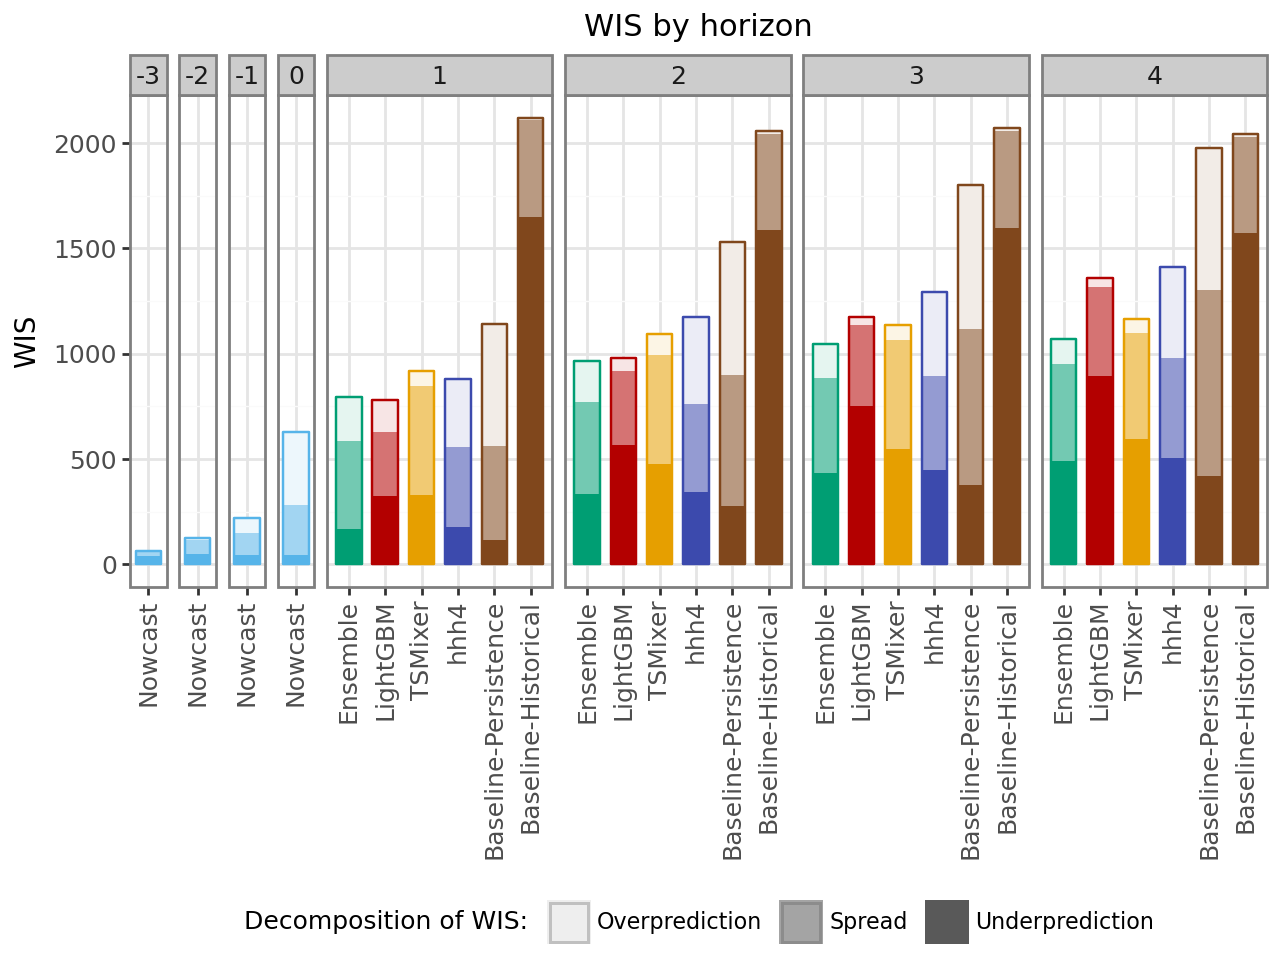

In [34]:
p = plot_scores_by_horizon_and_model(df_long, 'national', ['Nowcast'] + MAIN_MODELS)
p 

In [70]:
p.save("../figures/wis_national_horizon.pdf", width = 165, height = 120, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 165.0 x 120.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_national_horizon.pdf


/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


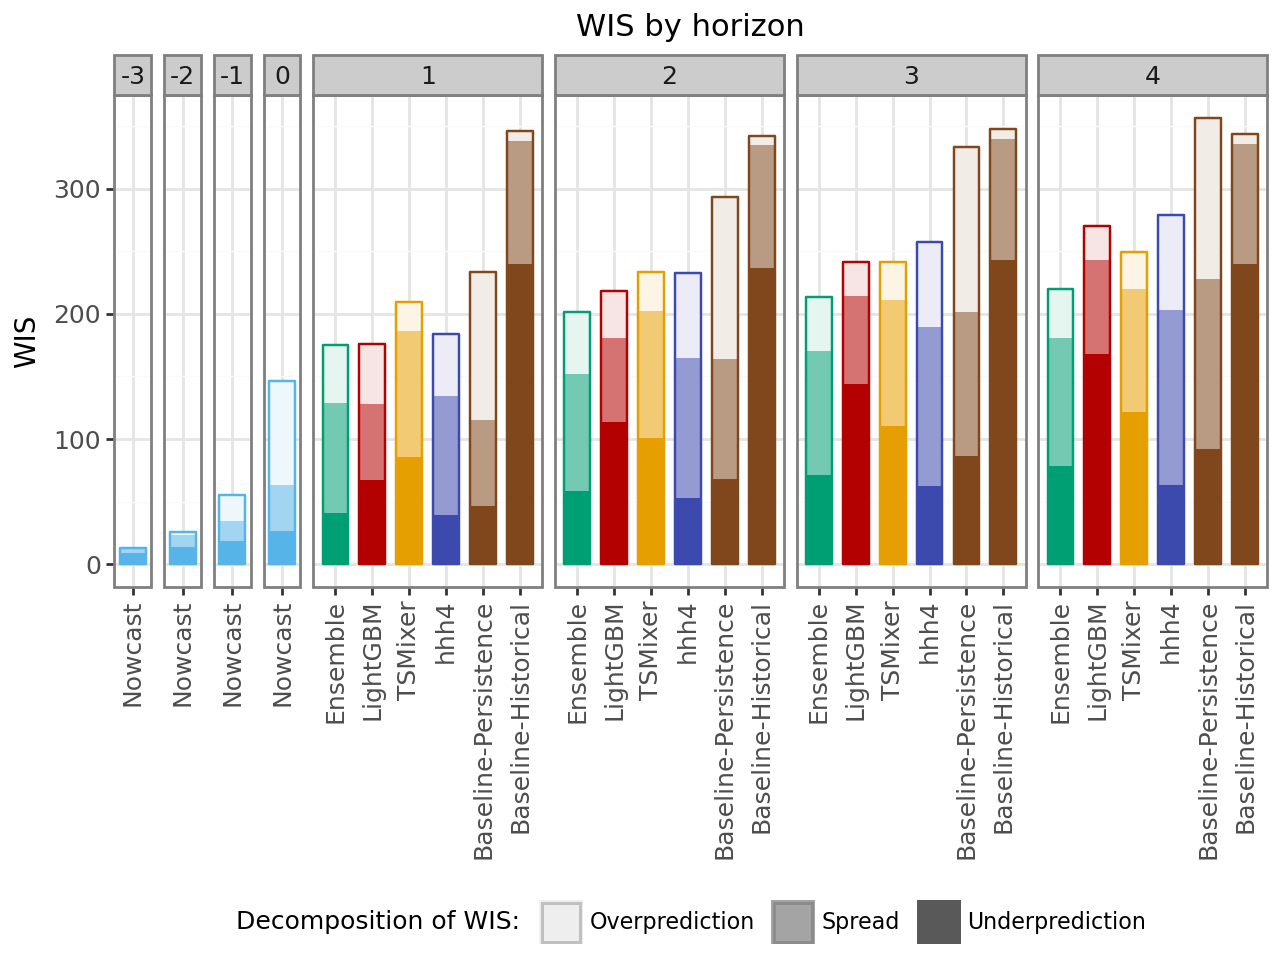

In [35]:
p = plot_scores_by_horizon_and_model(df_long, 'age', ['Nowcast'] + MAIN_MODELS)
p 

In [31]:
p.save("../figures/wis_age_horizon.pdf", width = 165, height = 120, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 165.0 x 120.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_age_horizon.pdf
